# Image Segmentation

### 👽 Import Libraries


In [1]:
#!pip install transformers
#!pip install gradio
#!pip install timm
#!pip install torchvision

- **!pip install transformers:** Installs the Transformers library, which provides state-of-the-art natural language processing models for various tasks such as text classification, translation, summarization, and question answering.

- **!pip install gradio:** Installs Gradio, a Python library that simplifies the creation of interactive web-based user interfaces for machine learning models, allowing users to interact with models via a web browser.

- **!pip install timm:** Installs Timm, a PyTorch library that offers a collection of pre-trained models and a simple interface to use them, primarily focused on computer vision tasks such as image classification and object detection.

- **!pip install torchvision:** is used to install the torchvision library, facilitating computer vision tasks in Python environments.

In [2]:
# to avoid warnings

from transformers.utils import logging

logging.set_verbosity_error()

# Build the image-segmentation pipeline using 🤗 Transformers Library

In [3]:
from transformers import pipeline

**🔍 Segmentation Anything Model (SAM)** is a versatile deep learning architecture 🧠🖼️ designed for pixel-wise segmentation tasks, capable of accurately delineating objects within images for various applications such as object detection, medical imaging, and autonomous driving.
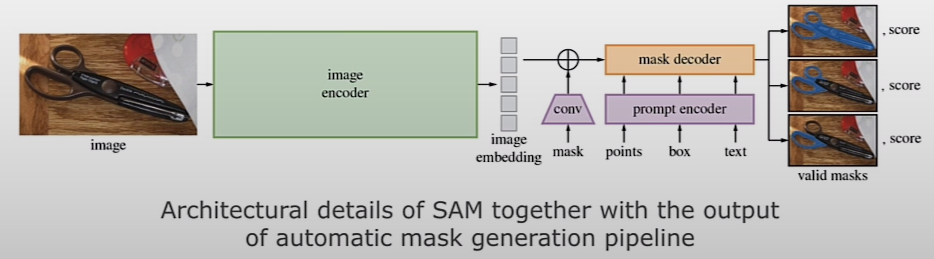


**🔍 SlimSAM(Segment Anything Model):**

SlimSAM, a novel SAM compression method, efficiently reuses pre-trained SAMs through a unified pruning-distillation framework and **employs masking for selective parameter retention**. By integrating an innovative alternate slimming strategy and a label-free pruning criterion, SlimSAM reduces parameter counts to 0.9%, MACs to 0.8%, and requires only 0.1% of the training data compared to the original SAM-H. Extensive experiments demonstrate superior performance with over 10 times less training data usage compared to other SAM compression methods.

**Masking in SlimSAM** selectively retains crucial parameters, enabling efficient compression of pre-trained SAMs without sacrificing performance, by focusing on essential features and discarding redundancies.

👉 model: https://huggingface.co/Zigeng/SlimSAM-uniform-77

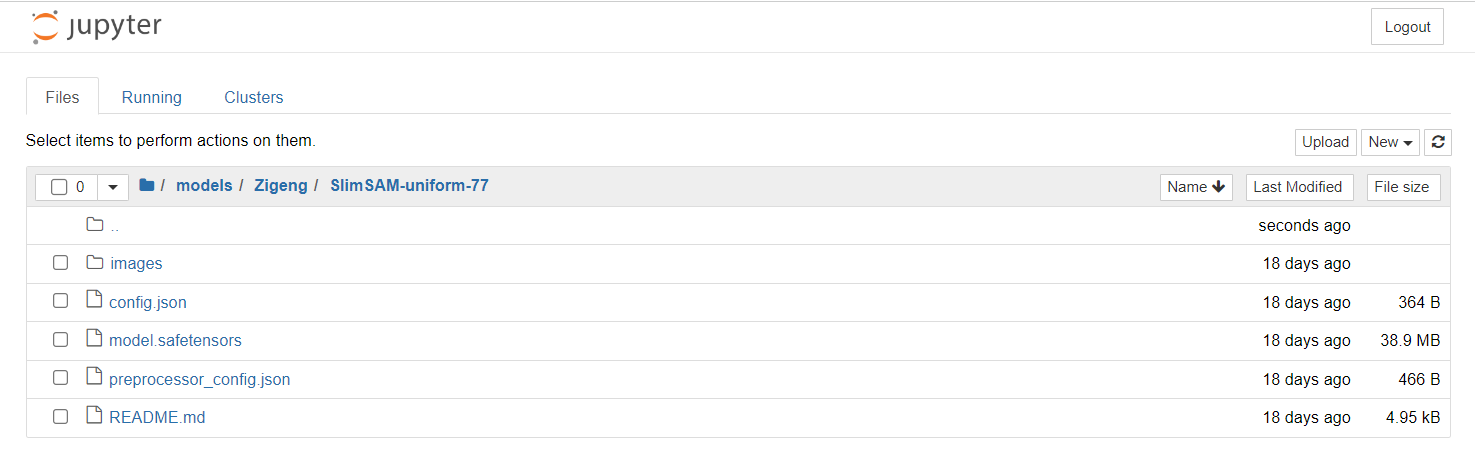

In [4]:
#image masking
sam_pipe = pipeline("mask-generation",
    "./models/Zigeng/SlimSAM-uniform-77")

In [5]:
print(f"pipeline for masking: {sam_pipe} in memory address")

pipeline for masking: <transformers.pipelines.mask_generation.MaskGenerationPipeline object at 0x7f102da94130> in memory address


In [6]:
#Display image
from PIL import Image

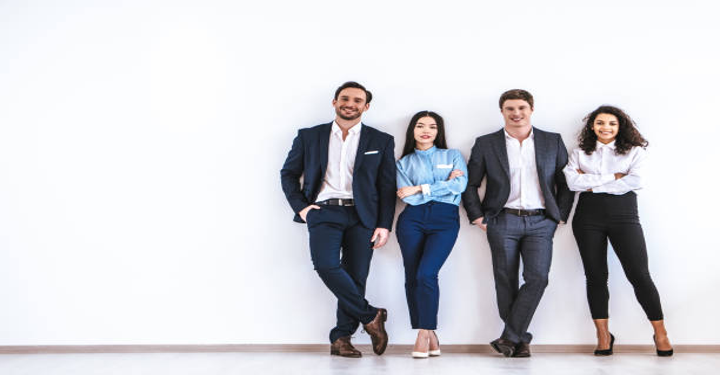

In [8]:
raw_image = Image.open("4-persons.jpg")
raw_image.resize((720, 375))

In [10]:
output = sam_pipe(raw_image, points_per_batch =32)
print(f"output of pipeline of raw image: \n {output}")

output of pipeline of raw image: 
 {'masks': [array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, Fal

**💡 Key Notes:**

**`points_per_batch = 32`** in image processing denotes the number of pixel points considered in each batch during model training or inference 🖼️, aiding in efficient computation of gradients and optimization algorithms, thereby enhancing training speed and resource utilization.

**📌 note:** for smaller size in `points_per_batch` is lesser accuracy but less computationally expensive.

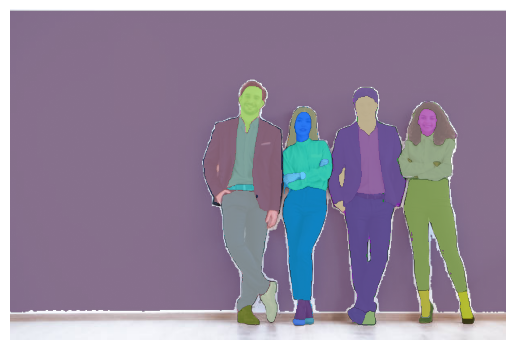

In [11]:
#to show image after segmentation

from helper import show_pipe_masks_on_image

show_pipe_masks_on_image(raw_image, output)

# 🔍 Use SlimSAM(Segment Anything Model) without Pipeline

In [12]:
from transformers import SamModel, SamProcessor

In [14]:
model = SamModel.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

processor = SamProcessor.from_pretrained(
    "./models/Zigeng/SlimSAM-uniform-77")

In [15]:
print(f"model details: \n {model}")

model details: 
 SamModel(
  (shared_image_embedding): SamPositionalEmbedding()
  (vision_encoder): SamVisionEncoder(
    (patch_embed): SamPatchEmbeddings(
      (projection): Conv2d(3, 168, kernel_size=(16, 16), stride=(16, 16))
    )
    (layers): ModuleList(
      (0-11): 12 x SamVisionLayer(
        (layer_norm1): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (attn): SamVisionAttention(
          (qkv): Linear(in_features=168, out_features=504, bias=True)
          (proj): Linear(in_features=168, out_features=168, bias=True)
        )
        (layer_norm2): LayerNorm((168,), eps=1e-06, elementwise_affine=True)
        (mlp): SamMLPBlock(
          (lin1): Linear(in_features=168, out_features=696, bias=True)
          (lin2): Linear(in_features=696, out_features=168, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (neck): SamVisionNeck(
      (conv1): Conv2d(168, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (layer_norm1): SamLay


- 🧠 The model variable initializes a SlimSAM model instance loaded from pre-trained weights 🧠🔗 located at "./models/Zigeng/SlimSAM-uniform-77", enabling tasks like inference or fine-tuning.

- 🔗 The processor variable initializes a SamProcessor instance loaded with pre-trained settings 🛠️🔗 located at "./models/Zigeng/SlimSAM-uniform-77", facilitating data preprocessing for compatibility with the SlimSAM model during inference or fine-tuning processes.

- 🛠️ Pretrained settings encompass pre-defined configurations or parameters obtained from training a model 🧠🔗, facilitating effective performance in related tasks with minimal fine-tuning or adjustment.

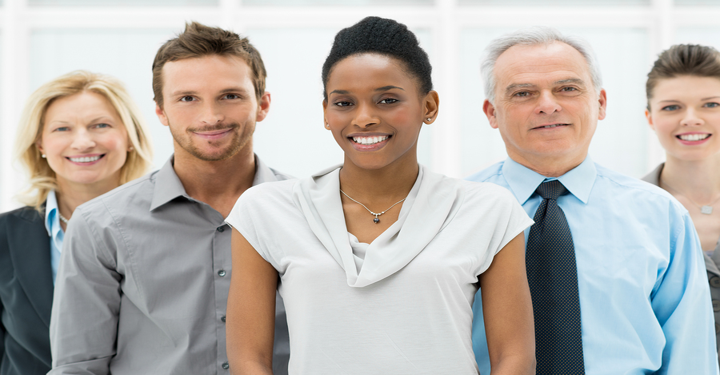

In [108]:
raw_image = Image.open("5-persons.jpg")
raw_image.resize((720, 375))

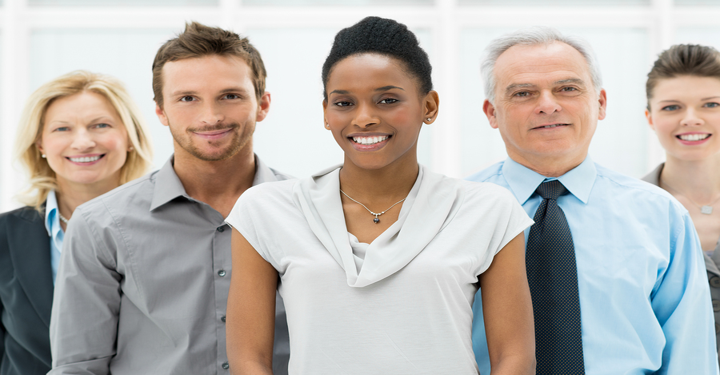

In [109]:
raw_image.resize((720, 375))

In [138]:
input_points = [[[750, 300]]]
print(f"input points: {input_points}")

input points: [[[750, 300]]]


In [139]:
inputs = processor(raw_image,
                 input_points=input_points,
                 return_tensors="pt")

In [140]:
print(f"inputs: \n {inputs}")

inputs: 
 {'pixel_values': tensor([[[[1.4954, 1.5125, 1.5639,  ..., 1.5639, 1.5639, 1.5639],
          [1.4783, 1.4954, 1.5468,  ..., 1.5810, 1.5982, 1.5982],
          [1.4612, 1.4783, 1.5297,  ..., 1.5982, 1.6153, 1.6153],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[1.8158, 1.8508, 1.9034,  ..., 1.9034, 1.9034, 1.9034],
          [1.7983, 1.8333, 1.8859,  ..., 1.9209, 1.9384, 1.9384],
          [1.7808, 1.8158, 1.8683,  ..., 1.9384, 1.9559, 1.9559],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[2.0125, 2.0474, 2.0997,  ..., 2.1520, 2.1346, 2.1346],
          [1.9951, 2.0300, 2.0823,  ..., 2.1520, 2.1346, 2.1346],
          [1.97

In [141]:
import torch

In [ ]:
with torch.no_grad():
    outputs = model(**inputs)

**📌 note:** 
with `torch.no_grad(): outputs = model(**inputs)` runs the model inference without tracking operations for gradient computation, thereby conserving memory resources and speeding up the inference process.

**Gradient computation 📈** refers to calculating the derivatives of a loss function with respect to the model parameters, crucial for updating weights during training. These gradients indicate the direction and magnitude of parameter updates needed to minimize the loss during training through optimization algorithms like gradient descent.

In [ ]:
print(f"output details: \n {outputs}")

In [ ]:
predicted_masks = processor.image_processor.post_process_masks(
    outputs.pred_masks,
    inputs["original_sizes"],
    inputs["reshaped_input_sizes"]
)

In [ ]:
print(f"predicted_masks: \n {predicted_masks}")

In [ ]:
print(f"length of predicted_masks: \n {len(predicted_masks)}")

In [ ]:
predicted_mask = predicted_masks[0]
predicted_mask_shape = predicted_mask.shape
print(f"shape of predicted_mask: \n {predicted_mask_shape}")

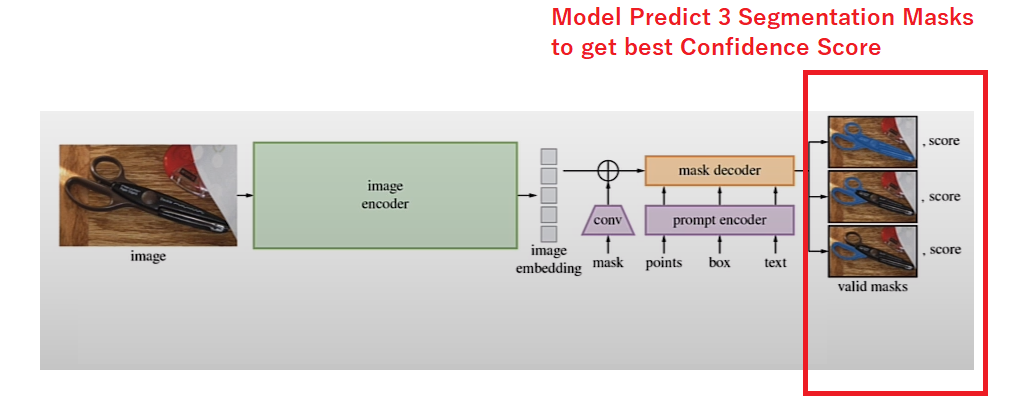

In [ ]:
print(f"confidence Scores: {outputs.iou_scores}")

In [ ]:
from helper import show_mask_on_image

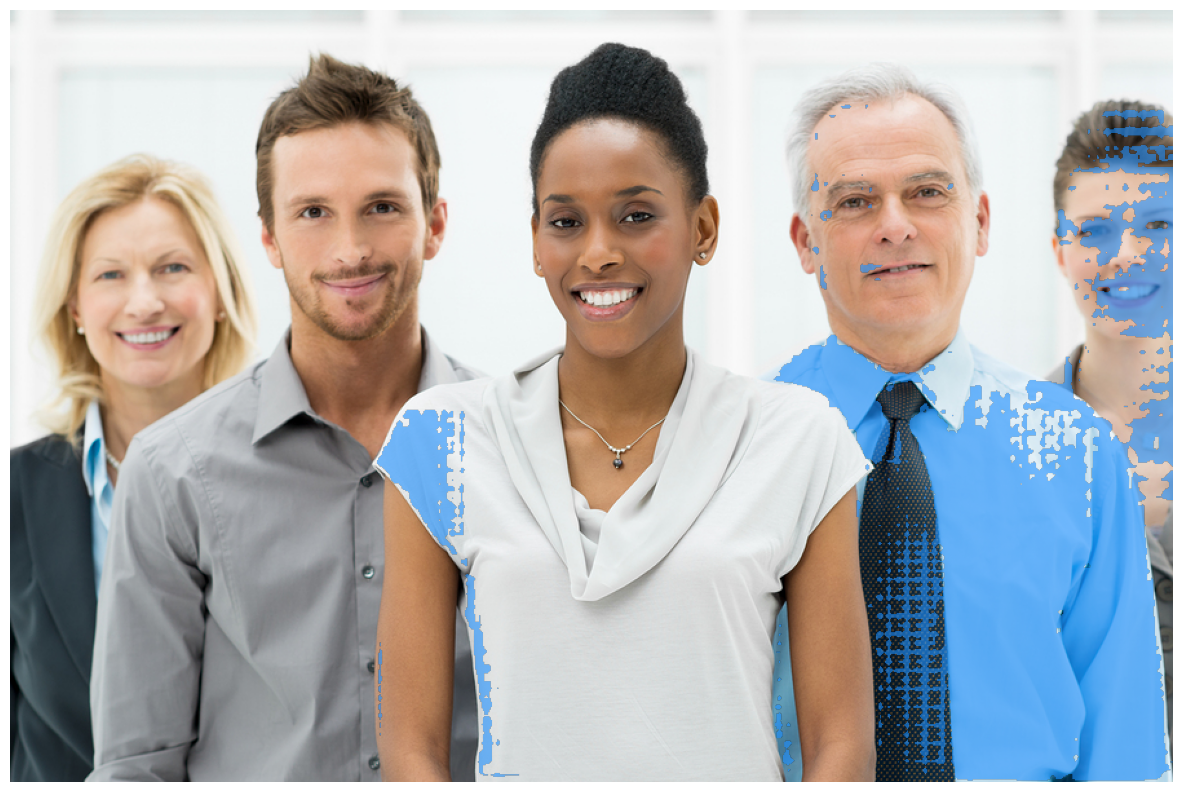

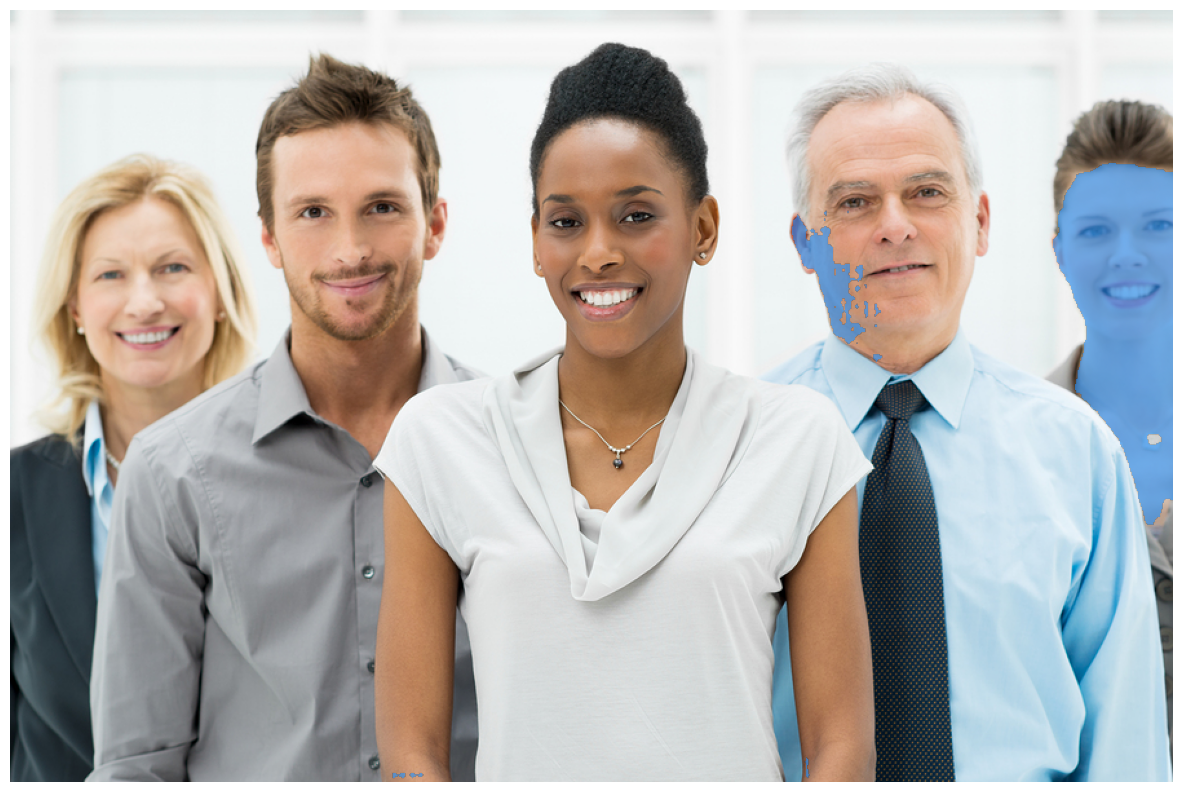

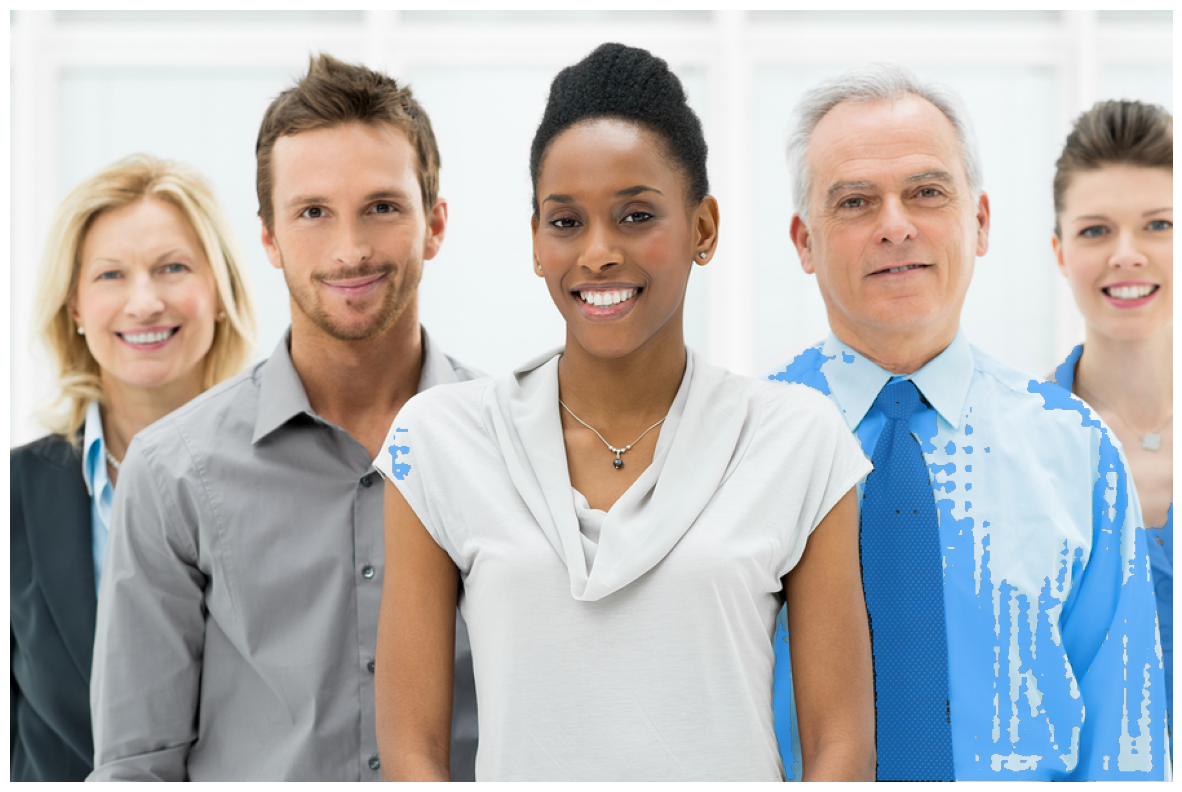

In [137]:
for i in range(3):
    show_mask_on_image(raw_image, predicted_mask[:, i])